In [5]:
import pandas as pd
import numpy as np

In [6]:
tests = {'sv_models_64dim':'sv'}

In [7]:
name_models=['knn', 'rf', 'ab', 'cb', 'gb']

In [8]:
metrics=['rouge-1', 'rouge-2', 'rouge-l']

In [9]:
columns = [ "{}_{}".format(i,j) for i in name_models for j in metrics]

In [10]:
results = []
for num_test in range(1,31):
    
    for name_test, approach in tests.items():
        
        path_to_save = "/scratch/cinthiasouza/mv-text-summarizer/notebook/{}".format(name_test)
        result_comb = pd.read_csv("{}/test_{}/summaries/{}.csv".format(path_to_save, num_test, 'comb'))
                                  
        results.append(result_comb.describe().T['mean'])

In [11]:
df = pd.concat(results, axis=1).T

In [12]:
import scikit_posthocs as sp

In [13]:
knn = df['knn_rouge-1'].to_list()
rf = df['rf_rouge-1'].to_list()
ab = df['ab_rouge-1'].to_list()
cb = df['cb_rouge-1'].to_list()
gb = df['gb_rouge-1'].to_list()

In [26]:
columns=['knn_rouge-1', 'rf_rouge-1', 'ab_rouge-1', 'cb_rouge-1', 'gb_rouge-1']

In [14]:
x = np.array([knn, rf, ab, cb, gb])

The null hypothesis (H0): The mean for each population is equal.
    
The alternative hypothesis: (Ha): At least one population mean is different from the rest.

In [15]:
from scipy import stats

stats.friedmanchisquare(knn, rf, ab, cb, gb)

FriedmanchisquareResult(statistic=120.0, pvalue=5.341471565244885e-25)

p-value is less than 0.05, we can reject the null hypothesis

In [16]:
import scikit_posthocs as sp
import numpy as np

#perform Nemenyi post-hoc test
result = sp.posthoc_nemenyi_friedman(x.T)
result

,0,1,2,3,4
0,1.000000,0.102437,0.001000,0.102437,0.001000
1,0.102437,1.000000,0.001000,0.001000,0.001000
2,0.001000,0.001000,1.000000,0.001000,0.102437
3,0.102437,0.001000,0.001000,1.000000,0.102437
4,0.001000,0.001000,0.102437,0.102437,1.000000


At α = .05, the only two groups that have statistically significantly different means are group 1 and group 3 e 4

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

pd.set_option('display.max_columns', 7)
data = df[columns]

In [35]:
result = autorank(data, alpha=0.05, verbose=False, approach='frequentist')

In [36]:
create_report(result)

The statistical analysis was conducted for 5 populations with 30 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.644). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and reject the null hypothesis (p=0.000) that thedata is homoscedastic. Thus, we assume that our data is heteroscedastic.
Because we have more than two populations and the populations are normal but heteroscedastic, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the mean value (M), the standard deviation (SD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference

In [38]:
result

RankResult(rankdf=             meanrank      mean           std  ci_lower  ci_upper effect_size  \
rf_rouge-1        5.0  0.454165  1.113028e-03  0.453605  0.454725         0.0   
knn_rouge-1       4.0  0.474582  2.258405e-16  0.474582  0.474582  -25.941731   
cb_rouge-1        3.0  0.481768  3.952209e-16  0.481768  0.481768  -35.072329   
gb_rouge-1        2.0  0.487850  2.823006e-16   0.48785   0.48785  -42.800694   
ab_rouge-1        1.0  0.490332  1.693804e-16  0.490332  0.490332    -45.9542   

              magnitude  
rf_rouge-1   negligible  
knn_rouge-1       large  
cb_rouge-1        large  
gb_rouge-1        large  
ab_rouge-1        large  , pvalue=5.341471565244885e-25, cd=1.1135996351508262, omnibus='friedman', posthoc='nemenyi', all_normal=True, pvals_shapiro=[0.6436989307403564, 1.0, 1.0, 1.0, 1.0], homoscedastic=False, pval_homogeneity=0.0, homogeneity_test='bartlett', alpha=0.05, alpha_normality=0.01, num_samples=30, posterior_matrix=None, decision_matrix=None, rope=N

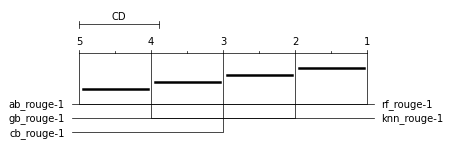

In [37]:
plot_stats(result)
plt.show()